# Project Code: Water Quality Prediction using Machine Learning

## Task Outline:

1. Understand the problem statement
2. Import datasets and libraries 
3. Preview Data
4. Clean and Format Data
5. Exploratory Data Analysis (Explore interesting themes)
6. Prepare data for modeling
7. Model Data
8. Evaluate model
9. Conclusions
   Appendix: Sources Referenced

### Task 1: Understanding the Problem Statement

#### Context

Access to clean, safe drinking water is essential for health and is a basic human right. It is one of the United Nations Sustainable Development Goals for 2030. Water quality is however challenged by increasing pollution, lack of sanitation, degradation of freshwater resources due to disposal of untreated wastewater, increasing demand with limited scarce water resourcces and climate change. Water quality has far reaching implications on health, food production, ecosystems, and economic growth. 


#### Content - About the Dataset

The water_potability.csv file contains water quality metrics for 3276 different water bodies.

1. pH value:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.



2. Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.



3. Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.



4. Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.



5. Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.



6. Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.



7. Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.



8. Trihalomethanes:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.



9. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.



10. Potability:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

Source Link for Dataset: <https://www.kaggle.com/adityakadiwal/water-potability>

### Goal: 
Analyze the dataset, identify key features and build a water quality prediction model to predict whether water will be potable(safe to drink) or not potable(not safe to drink).


### Task 2: Importing Libraries and Read in Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [3]:
waterQ = pd.read_csv('/Users/trishonabisram/Downloads/water_potability.csv')

### Task 3: Preview Data

In [4]:
waterQ.shape

(3276, 10)

In [5]:
waterQ.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


 - NaN missing values noted in some columns such as ph, Sulfate - total number of missing values to be determined.

In [6]:
waterQ.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


 - All features have numeric data, there are no categorical columns in the dataset.

In [7]:
waterQ.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

 - Potability is our target column, with 1 representing Water is Potable, safe to drink and 0 being Water is not potable, not safe to drink.

In [8]:
waterQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


 - There are missing values in ph, Sulfate and Trihalomethanes columns (total number determined below). Data types seem appropriate for features, no change needed.

In [9]:
waterQ.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [10]:
waterQ.isnull().sum()*100/len(waterQ)

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

 - There seems to be large numbers of missing values in ph, Sulfate and Trihalomethanes; proportionally, there are 15%, 24% and 5% missing in each of those columns. According to research (AnalyticsVidya), 25-30% is in the maximum range of missing values before deletion may become suitable, so we will keep our data included for further exploration

In [11]:
waterQ.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


### Task 4: Cleaning and Formatting Data

 - Filling in missing values with respective mean values by feature.

In [12]:
waterQ.fillna(waterQ.mean(axis=0), inplace = True)

 - re-checking null values.

In [13]:
waterQ.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [14]:
waterQ.nunique()

ph                 2786
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2496
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3115
Turbidity          3276
Potability            2
dtype: int64

### Task 5: Exploratory Data Analysis 
 - Questions to find answers to:
     - As our main purpose in the analysis is to be able to predict when water is safe to drink (potability = 1):
     
     Research: 
      - What are the quality standards of safe drinking water?
      - Understanding all variables in the dataset (meaning, its distribution, safety ranges, and how it may  affect water quality) 
       
 - Q1. Which are the key features affecting the potability of water?
 - Q2. How are the features related? - Can the dataset be reduced?
 - Q3. How best can we model these features and relationships to predict potability in the future?

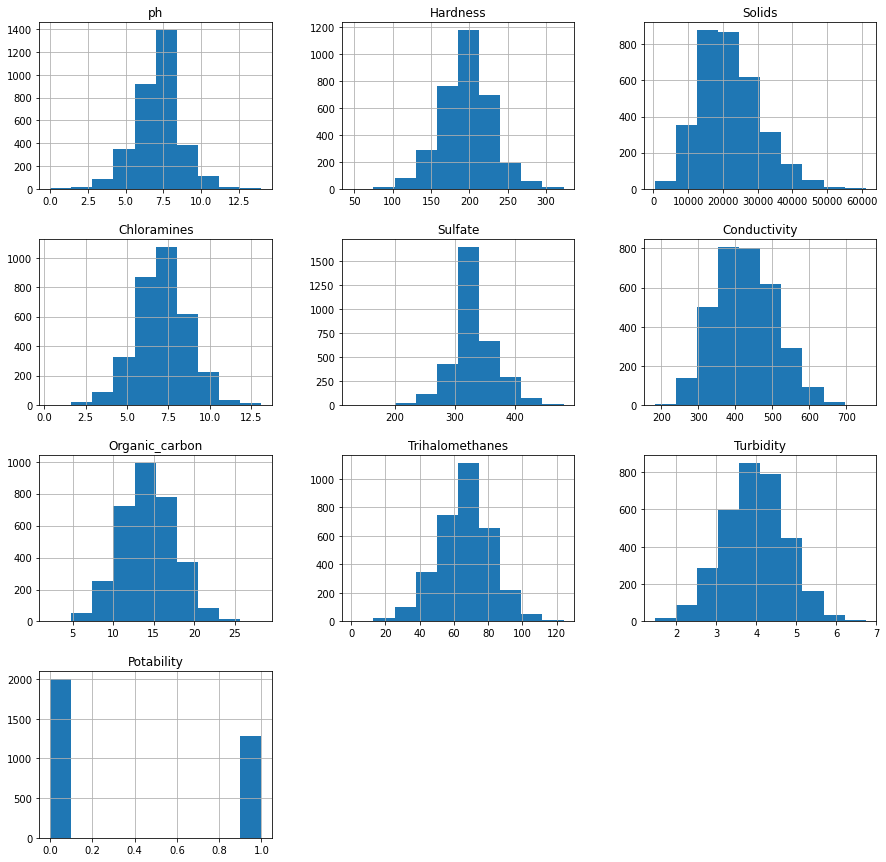

In [15]:
waterQ.hist(figsize = (15,15))
plt.show()

 - From the above histograms, Hardness, Chloramines, Conductivity, Organic Carbon, Trihalomethanes and Turbidity appear to be more normally distributed. Solids seems to be positively skewed with a longer right tail. ph and Sulfate appear to be more asymmetrical than the other features. Potability refers to our target class (0,1).

In [16]:
waterQ.mean()

ph                     7.080795
Hardness             196.369496
Solids             22014.092526
Chloramines            7.122277
Sulfate              333.775777
Conductivity         426.205111
Organic_carbon        14.284970
Trihalomethanes       66.396293
Turbidity              3.966786
Potability             0.390110
dtype: float64

In [17]:
waterQ.median()

ph                     7.080795
Hardness             196.967627
Solids             20927.833607
Chloramines            7.130299
Sulfate              333.775777
Conductivity         421.884968
Organic_carbon        14.218338
Trihalomethanes       66.396293
Turbidity              3.955028
Potability             0.000000
dtype: float64

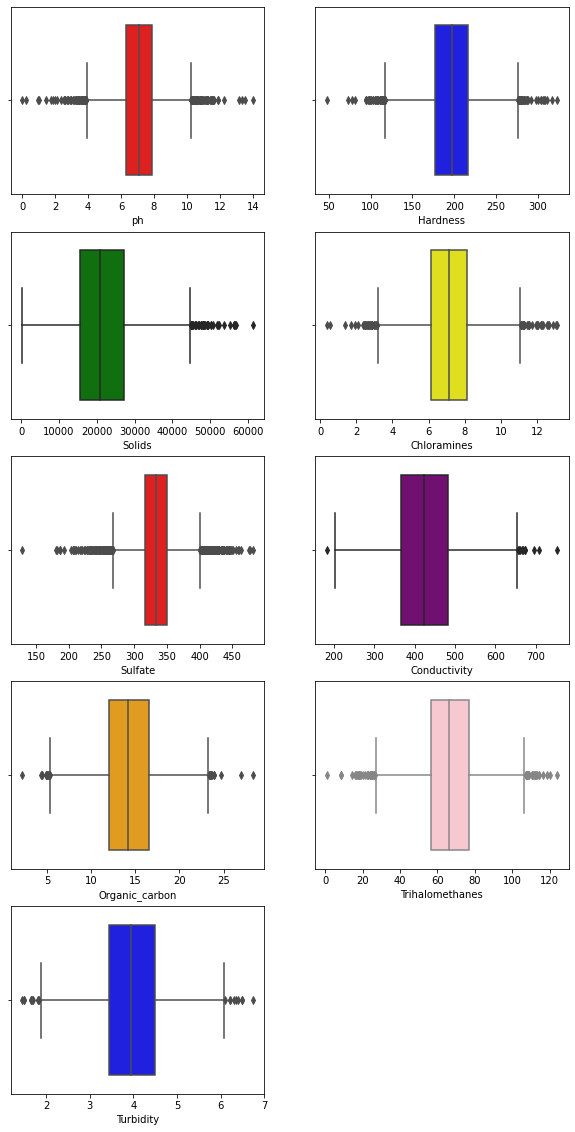

In [18]:
#Plotting boxplots of features to view distributions vs outliers

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 20),sharey = True)

sns.boxplot(ax = axes[0,0], x=waterQ["ph"], color ='red')
sns.boxplot(ax = axes[0,1], x=waterQ["Hardness"], color ='blue')
sns.boxplot(ax = axes[1,0], x=waterQ["Solids"], color ='green')
sns.boxplot(ax = axes[1,1], x=waterQ["Chloramines"], color ='yellow')
sns.boxplot(ax = axes[2,0], x=waterQ["Sulfate"], color ='red')
sns.boxplot(ax = axes[2,1], x=waterQ["Conductivity"], color ='purple')
sns.boxplot(ax = axes[3,0], x=waterQ["Organic_carbon"], color ='orange')
sns.boxplot(ax = axes[3,1], x=waterQ["Trihalomethanes"], color ='pink')
sns.boxplot(ax = axes[4,0], x=waterQ["Turbidity"], color ='blue')
sns.boxplot(ax = axes[4,1], x=waterQ["Turbidity"], color ='blue')
fig.delaxes(axes[4,1])


 - The boxplot for Solids also demonstrates its skewness to the right, however considering that Solids refer to the level of minerals dissolved in the water which can affect the quality of drinking water, it makes sense to keep these values included, as it can be useful in training our model to recognize poor quality drinking water.

In [19]:
# View a summary of the Potable (Target) feature by values, and then shares of 0,1.
waterQ['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

 - According to the above data, there is a majority being 0, the water is not potable and not safe to drink; the shares of this to follow visually.

In [52]:
import plotly.graph_objects as go #interactive visualisations
fig = go.Figure(data = [go.Pie(labels=['Not Potable(0)', 'Potable(1)'], values = (waterQ['Potability'].value_counts()))])
fig.show()

 - The majority share 61% of our sample observations is water that is not potable (0) and is not safe to drink. The data appears imbalanced with an imbalance ratio of 61:39 or 1.6:1. According to research (MachineLearningMastery.com), this can be considered to be a 'slight imbalance', in contrast to cases with 'sever imbalances' of 1:100 ratio or more, which need specialized techniques to model the data. 

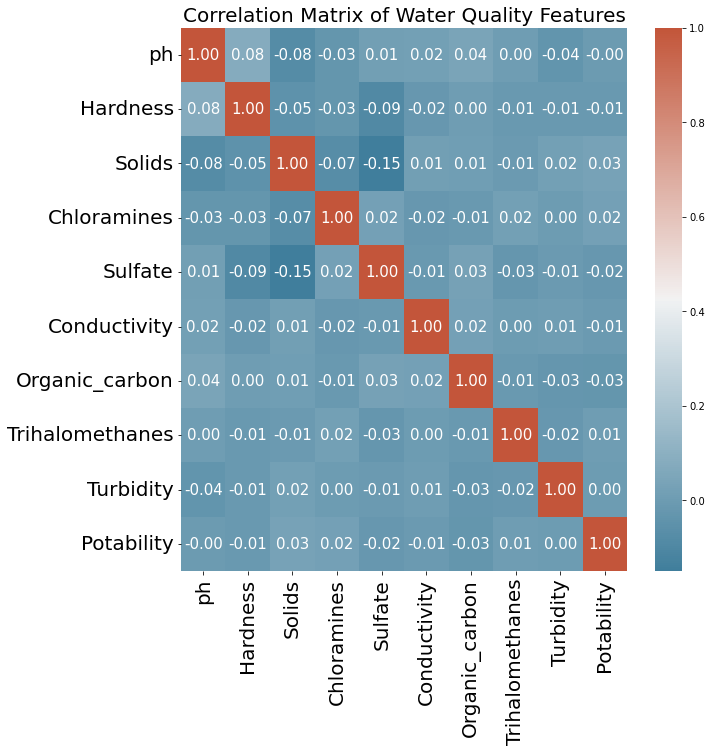

In [21]:
# Plotting a correlation matrix of features:
correlation_matrix = waterQ.corr()
plt.figure(figsize=(10,10))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
sns.heatmap(correlation_matrix, annot = True, fmt ='0.2f',annot_kws={"size": 15}, cmap = sns.diverging_palette(230, 20, as_cmap=True))
plt.title("Correlation Matrix of Water Quality Features", fontsize = 20)
plt.show()

 - The correlation matrix reveals there are no strong correlations among features, which also mean the dimensions of the dataset cannot be reduced further on basis of correlation.

Text(0.5, 1.0, 'Distribution of ph by Potability')

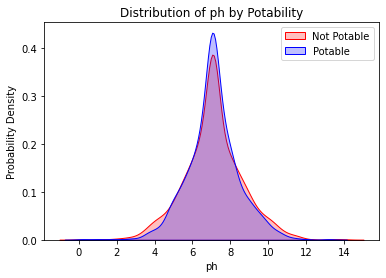

In [22]:
# Analyzing Class of Potability by Feature: ph
chart = sns.kdeplot(waterQ.ph[(waterQ['Potability']==0)],color = 'Red', shade = True)
chart = sns.kdeplot(waterQ.ph[(waterQ['Potability']==1)],color = 'Blue', shade = True)
chart.legend(["Not Potable", "Potable"],loc ='upper right')
chart.set_ylabel("Probability Density")
chart.set_xlabel("ph")
chart.set_title("Distribution of ph by Potability")

 - 

Text(0.5, 1.0, 'Distribution of Hardness by Potability')

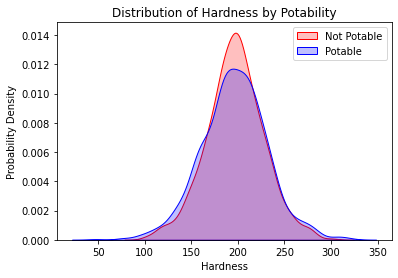

In [23]:
# Analyzing Class of Potability by Feature: Hardness
chart = sns.kdeplot(waterQ.Hardness[(waterQ['Potability']==0)],color = 'Red', shade = True)
chart = sns.kdeplot(waterQ.Hardness[(waterQ['Potability']==1)],color = 'Blue', shade = True)
chart.legend(["Not Potable", "Potable"],loc ='upper right')
chart.set_ylabel("Probability Density")
chart.set_xlabel("Hardness")
chart.set_title("Distribution of Hardness by Potability")

Text(0.5, 1.0, 'Distribution of Solids by Potability')

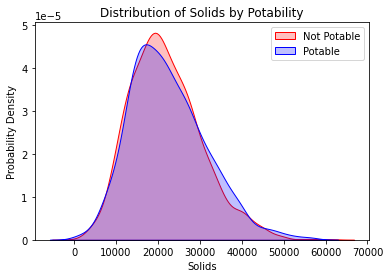

In [24]:
# Analyzing Class of Potability by Feature: Solids
chart = sns.kdeplot(waterQ.Solids[(waterQ['Potability']==0)],color = 'Red', shade = True)
chart = sns.kdeplot(waterQ.Solids[(waterQ['Potability']==1)],color = 'Blue', shade = True)
chart.legend(["Not Potable", "Potable"],loc ='upper right')
chart.set_ylabel("Probability Density")
chart.set_xlabel("Solids")
chart.set_title("Distribution of Solids by Potability")

Text(0.5, 1.0, 'Distribution of Chloramines by Potability')

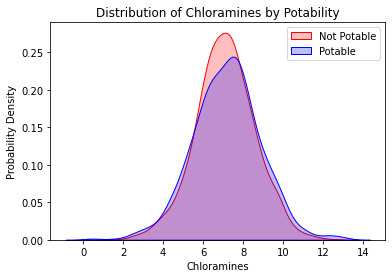

In [25]:
# Analyzing Class of Potability by Feature: Chloramines
chart = sns.kdeplot(waterQ.Chloramines[(waterQ['Potability']==0)],color = 'Red', shade = True)
chart = sns.kdeplot(waterQ.Chloramines[(waterQ['Potability']==1)],color = 'Blue', shade = True)
chart.legend(["Not Potable", "Potable"],loc ='upper right')
chart.set_ylabel("Probability Density")
chart.set_xlabel("Chloramines")
chart.set_title("Distribution of Chloramines by Potability")

Text(0.5, 1.0, 'Distribution of Sulfate by Potability')

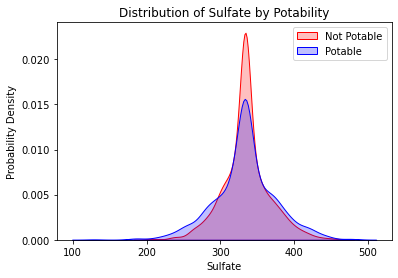

In [26]:
# Analyzing Class of Potability by Feature: Sulfate
chart = sns.kdeplot(waterQ.Sulfate[(waterQ['Potability']==0)],color = 'Red', shade = True)
chart = sns.kdeplot(waterQ.Sulfate[(waterQ['Potability']==1)],color = 'Blue', shade = True)
chart.legend(["Not Potable", "Potable"],loc ='upper right')
chart.set_ylabel("Probability Density")
chart.set_xlabel("Sulfate")
chart.set_title("Distribution of Sulfate by Potability")

Text(0.5, 1.0, 'Distribution of Conductivity by Potability')

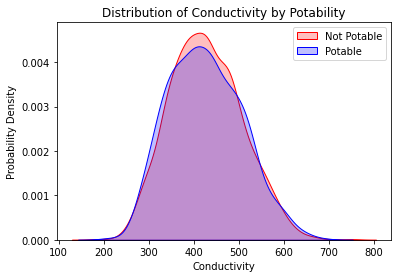

In [27]:
# Analyzing Class of Potability by Feature: Conductivity
chart = sns.kdeplot(waterQ.Conductivity[(waterQ['Potability']==0)],color = 'Red', shade = True)
chart = sns.kdeplot(waterQ.Conductivity[(waterQ['Potability']==1)],color = 'Blue', shade = True)
chart.legend(["Not Potable", "Potable"],loc ='upper right')
chart.set_ylabel("Probability Density")
chart.set_xlabel("Conductivity")
chart.set_title("Distribution of Conductivity by Potability")

### Task 6: Prepare the data for modeling

Here we split up the dataset into train and test portions, and also explore feature importance using a RandomForestClassifier.


In [28]:
# Removing Potability from the training dataset and making it the label y. 
X = waterQ.drop(['Potability'], axis = 'columns')
y = waterQ['Potability']

In [29]:
# checking the data subsets in X and y:
X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [30]:
X.shape

(3276, 9)

In [31]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Potability, dtype: int64

In [32]:
y.shape

(3276,)

In [33]:
# Split dataset into train/test portions - an 80/20 split.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
# Verifying the split was successful:
X_train.shape

(2620, 9)

In [35]:
X_test.shape

(656, 9)

In [36]:
y_train.shape

(2620,)

In [37]:
y_test.shape

(656,)

In [38]:
# Getting an indication of the most important feature in the dataset by using the RandomForestClassifier model.

from sklearn.ensemble import RandomForestClassifier
# instantiate an object, rf:
rf = RandomForestClassifier()
# fit the model to the training set:
rf.fit(X_train, y_train.values.ravel())


RandomForestClassifier()

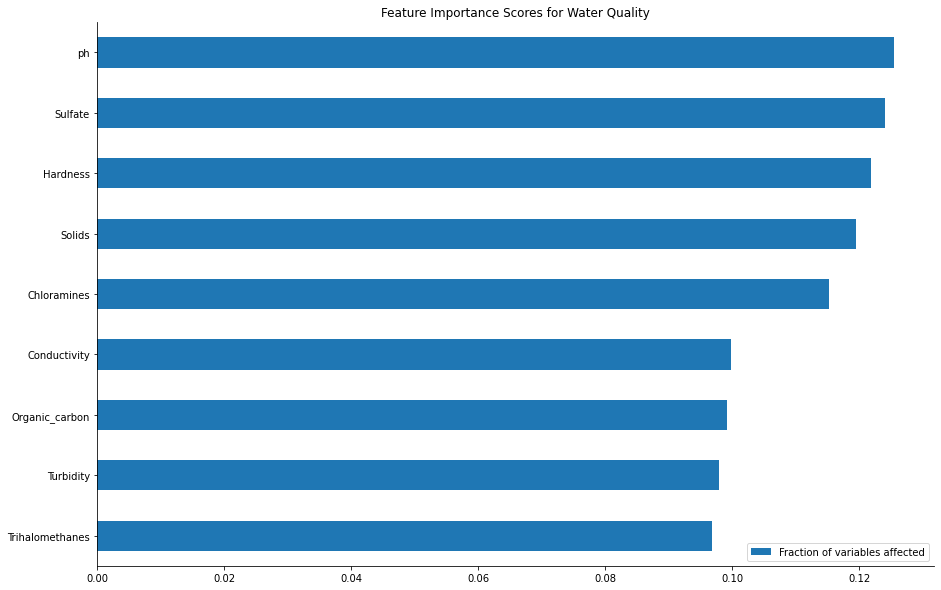

In [39]:
# To plot the feature importance, we need a separate dataframe:
feat_scores = pd.DataFrame({'Fraction of variables affected' :rf.feature_importances_}, index = X.columns)
feat_scores = feat_scores.sort_values(by = 'Fraction of variables affected')
feat_scores.plot(kind = 'barh', figsize = (15, 10)).set_title("Feature Importance Scores for Water Quality")
sns.despine()

 - The Random Forest Classifier for Feature Importance has identified the top 5 features being ph, Sulfate, Hardness, Solids and Chloramines. This is also supported by the exploratory data analysis done earlier. However it is possible that Turbidity might be more important in reality than is reflected by this model, as turbidity is one of the general water quality indicators used, as its clarity or lack thereof can point to contamination.

### Task 7 - Build and test Models

As we have a labeled dataset to train and test, this is a supervised machine learning case, particularly a binary classification problem because we aim to predict class 0 or 1 in our target variable, Potability. We can therefore build, train and test a few classification models, and evaluate their performance to choose our best model.

In [40]:
# Task 7.1 Train and Evaluate a Logistic Regression Classifier Model
# import relevant modules:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
# instantiate an object for this classifier
model_LR = LogisticRegression()
# train the model using the .fit() method
model_LR.fit(X_train, y_train)

LogisticRegression()

In [41]:
y_predict = model_LR.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.58      1.00      0.74       383
           1       0.00      0.00      0.00       273

    accuracy                           0.58       656
   macro avg       0.29      0.50      0.37       656
weighted avg       0.34      0.58      0.43       656



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [42]:
# Reviewing the confusion_matrix for the LogisticRegression Classifier model performance:
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[383   0]
 [273   0]]


[[383   0]
 [273   0]]


[Text(33.0, 0.5, 'True label'), Text(0.5, 15.0, 'Predicted label')]

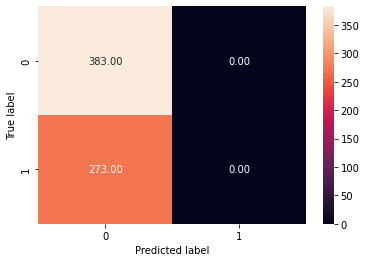

In [43]:
# Plotting a heatmap for the confusion matrix, RandomForest Classifier Model:
cm = confusion_matrix(y_test, y_predict)
print(cm)
ax = sns.heatmap(cm, annot = True, fmt = '0.2f')
ax.set(ylabel='True label', xlabel='Predicted label')

In [44]:
#task - SVM

In [45]:
# Task 7 - Train and Evaluate a RandomForestClassifier Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
# Perform predictions using RandomForestClassifier:
y_predict = model_rf.predict(X_test)

In [47]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.65      0.87      0.75       383
           1       0.66      0.36      0.46       273

    accuracy                           0.66       656
   macro avg       0.66      0.61      0.61       656
weighted avg       0.66      0.66      0.63       656



[[334  49]
 [176  97]]


[Text(33.0, 0.5, 'True label'), Text(0.5, 15.0, 'Predicted label')]

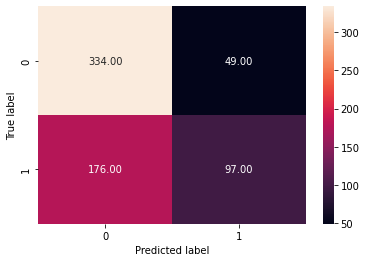

In [48]:
# Plotting a heatmap for the confusion matrix, RandomForest Classifier Model:
cm = confusion_matrix(y_test, y_predict)
print(cm)
ax = sns.heatmap(cm, annot = True, fmt = '0.2f')
ax.set(ylabel='True label', xlabel='Predicted label')

## Conclusion
From the models built, the random forest classifier model scored better on the precision rate (0.65) rate. However its recall (0.32) and F1 score (0.43) are still low, indicating the model can be improved. To do this, we can consider correcting for the slight imbalance in the dataset to see if that works, and also training and testing more classification models.

 - Addressing the problem of imbalance by using a rule of thumb to oversample the dataset given its size (<10000) (source: MachineLearningMastery)

## Sources:
Knowledge Extraction based on Evolutionary Learning (2018), "Imbalanced Datasets", link <https://sci2s.ugr.es/keel/imbalanced.php>
Data Science (2021), "Water Quality Prediction using Machine Learning", Link <https://www.datascience2000.in/2021/10/water-quality-prediction-using-machine.html>


Kaggle notebooks referenced:


## EXTRAS

Text(0.5, 1.0, 'Distribution of Organic Carbon by Potability')

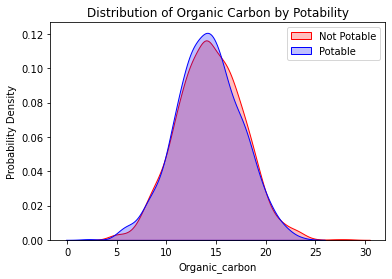

In [49]:
# Analyzing Class of Potability by Feature: Organic_carbon
chart = sns.kdeplot(waterQ.Organic_carbon[(waterQ['Potability']==0)],color = 'Red', shade = True)
chart = sns.kdeplot(waterQ.Organic_carbon[(waterQ['Potability']==1)],color = 'Blue', shade = True)
chart.legend(["Not Potable", "Potable"],loc ='upper right')
chart.set_ylabel("Probability Density")
chart.set_xlabel("Organic_carbon")
chart.set_title("Distribution of Organic Carbon by Potability")

Text(0.5, 1.0, 'Distribution of Trihalomethanes by Potability')

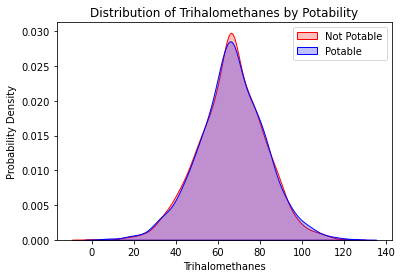

In [50]:
# Analyzing Class of Potability by Feature: Trihalomethanes
chart = sns.kdeplot(waterQ.Trihalomethanes[(waterQ['Potability']==0)],color = 'Red', shade = True)
chart = sns.kdeplot(waterQ.Trihalomethanes[(waterQ['Potability']==1)],color = 'Blue', shade = True)
chart.legend(["Not Potable", "Potable"],loc ='upper right')
chart.set_ylabel("Probability Density")
chart.set_xlabel("Trihalomethanes")
chart.set_title("Distribution of Trihalomethanes by Potability")

Text(0.5, 1.0, 'Distribution of Turbidity by Potability')

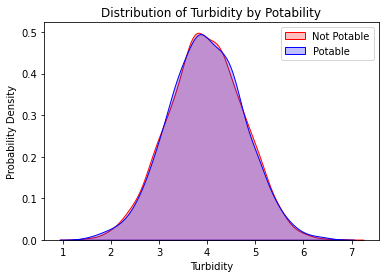

In [51]:
# Analyzing Class of Potability by Feature: Turbidity
chart = sns.kdeplot(waterQ.Turbidity[(waterQ['Potability']==0)],color = 'Red', shade = True)
chart = sns.kdeplot(waterQ.Turbidity[(waterQ['Potability']==1)],color = 'Blue', shade = True)
chart.legend(["Not Potable", "Potable"],loc ='upper right')
chart.set_ylabel("Probability Density")
chart.set_xlabel("Turbidity")
chart.set_title("Distribution of Turbidity by Potability")